<a href="https://colab.research.google.com/github/nathanbollig/vet-graduate-expectations-survey/blob/main/likert_figs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Likert Visualizations

This notebook will be used to generate figures to visualize Likert response data for the graduate expectations project. The input to this notebook are spreadsheets with subquestion-level data, such as `companion_animal.xlsx`, `equine.xlsx`, etc. These spreadsheets are in the format generated by `analysis.ipynb`, except with the addition of a rightmost column that contains an integer on rows that need to be pulled into a Likert visualization. The integer will designate the figure number.

In [123]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
import textwrap

## Retrieve and format data

In [124]:
def parse_file_name(string):
    string = string.split('.')[0]
    string = string.replace('_', ' ')
    return string.title()

def get_dfs(filenames):
    dfs = []
    for f in filenames:
        d = pd.read_excel(f, sheet_name=None)
        for sheet in d.values():
            if sheet.columns[-1] != "sig":
                # Wrap question text
                wrapper = textwrap.TextWrapper(width=55)
                sheet['Subquestion'] = sheet['Subquestion'].apply(lambda x: wrapper.fill(x))
                # Set index
                sheet.set_index('Subquestion')
                # Reformat figure column
                sheet.iloc[:,-1] = sheet.iloc[:,-1].fillna(0).astype(int)
                sheet.columns = list(sheet.columns[:-1]) + ["fig"]
                # Filter only rows that have a figure designation
                sheet = sheet[sheet['fig'] > 0]
                # Reformat sig column
                sheet.loc[:,'sig'] = sheet.loc[:,'sig'].fillna(False).replace('*', True).astype(bool)
                # Project only needed columns
                keep_strings = ['Subquestion', '0', '1', '2', '3', '4', 'sig', 'fig']
                mask = []
                for col in sheet.columns:
                    mask.append(False)  # Append False by default
                    for check_string in keep_strings:
                        if check_string in col:
                            mask[-1] = True  # Change to True if keeping
                sheet = sheet.loc[: , mask]
                # Append only when needed for a figure
                dfs.append(sheet)
    return dfs

In [125]:
filenames = ['summary_nontechnical_allspecies.xlsx']
dfs = get_dfs(filenames)

In [126]:
dfs[2]

,Subquestion,SVM: 0,SVM: 1,SVM: 2,SVM: 3,SVM: 4,WVMA: 0,WVMA: 1,WVMA: 2,WVMA: 3,WVMA: 4,sig,fig
0,Recognizes and responds to evidence of neglec...,0,0,2,16,24,2,9,11,48,37,True,15
1,Prioritizes and completes tasks according to\...,0,0,0,6,36,0,4,3,29,71,True,15
2,Acknowledges input and incorporates into ongo...,0,0,0,7,35,1,4,3,20,79,False,15
3,Identify individual personal and professional...,0,1,2,10,29,1,7,6,31,62,False,15
4,Seek professional development in areas of div...,6,1,2,9,24,19,3,4,22,59,False,15
5,Invites and responds to constructive feedback...,0,0,1,8,33,0,3,2,22,80,False,15
6,Uses appropriate resources for learning and d...,0,0,0,3,39,0,0,1,18,88,False,15
7,"Analyzes information for accuracy, reliabilit...",0,0,1,11,30,1,3,3,19,81,False,15


## More formatting

Reformat to one row per distribution

In [127]:
fig_nums = set()

for i in range(len(dfs)):
    # Create SVM table
    df_SVM = dfs[i].copy()
    df_SVM = df_SVM.iloc[:, [0,1,2,3,4,5,11,12]]
    df_SVM.columns = [df_SVM.columns[0]] + ['0', '1', '2', '3', '4'] + list(df_SVM.columns[-2:])
    df_SVM['pop'] = 'SVM'
    # Create WVMA table
    df_WVMA = dfs[i].copy()
    df_WVMA = df_WVMA.iloc[:, [0,6,7,8,9,10,11,12]]
    df_WVMA['pop'] = 'WVMA'
    df_WVMA.columns = df_SVM.columns.copy()
    # Concatenate tables
    df = pd.concat((df_SVM, df_WVMA))
    # Group by subquestion
    df.sort_values(by=['Subquestion'], inplace=True)
    dfs[i] = df
    # Add figure numbers to set
    for item in df['fig'].tolist():
        fig_nums.add(item)

In [128]:
fig_nums = list(fig_nums)
fig_nums.sort()
fig_nums

[13, 14, 15]

In [129]:
dfs[2]

,Subquestion,0,1,2,3,4,sig,fig,pop
2,Acknowledges input and incorporates into ongo...,0,0,0,7,35,False,15,SVM
2,Acknowledges input and incorporates into ongo...,1,4,3,20,79,False,15,WVMA
7,"Analyzes information for accuracy, reliabilit...",0,0,1,11,30,False,15,SVM
7,"Analyzes information for accuracy, reliabilit...",1,3,3,19,81,False,15,WVMA
3,Identify individual personal and professional...,0,1,2,10,29,False,15,SVM
3,Identify individual personal and professional...,1,7,6,31,62,False,15,WVMA
5,Invites and responds to constructive feedback...,0,0,1,8,33,False,15,SVM
5,Invites and responds to constructive feedback...,0,3,2,22,80,False,15,WVMA
1,Prioritizes and completes tasks according to\...,0,0,0,6,36,True,15,SVM
1,Prioritizes and completes tasks according to\...,0,4,3,29,71,True,15,WVMA


Now combine into one dataframe.

In [130]:
df = pd.concat(dfs)
df

,Subquestion,0,1,2,3,4,sig,fig,pop
4,Acknowledge client’s knowledge level and appr...,0,2,5,23,76,True,13,WVMA
4,Acknowledge client’s knowledge level and appr...,0,0,0,2,40,True,13,SVM
10,Build and maintain client relationships,0,0,0,3,39,False,13,SVM
10,Build and maintain client relationships,0,2,2,20,82,False,13,WVMA
5,Discuss quality of life issues with owners,0,0,0,2,40,True,13,SVM
5,Discuss quality of life issues with owners,1,3,3,27,73,True,13,WVMA
2,Discuss recommended treatment plan and option...,0,0,0,2,40,True,13,SVM
2,Discuss recommended treatment plan and option...,1,0,5,25,76,True,13,WVMA
1,Discuss recommended vaccination or preventive...,0,0,0,1,41,True,13,SVM
1,Discuss recommended vaccination or preventive...,2,2,4,17,82,True,13,WVMA


Convert counts to percentages

In [131]:
def convert_to_percents(row):
    vals = np.array(row[1:6])
    sum = np.sum(vals)
    vals = vals / sum * 100.0
    row[1:6] = vals
    return row

row = df.iloc[0,:]

In [132]:
row

Subquestion     Acknowledge client’s knowledge level and appr...
0                                                              0
1                                                              2
2                                                              5
3                                                             23
4                                                             76
sig                                                         True
fig                                                           13
pop                                                         WVMA
Name: 4, dtype: object

In [133]:
convert_to_percents(row)

Subquestion     Acknowledge client’s knowledge level and appr...
0                                                              0
1                                                        1.88679
2                                                        4.71698
3                                                        21.6981
4                                                        71.6981
sig                                                         True
fig                                                           13
pop                                                         WVMA
Name: 4, dtype: object

In [134]:
df = df.apply(lambda row: convert_to_percents(row), axis=1)

In [135]:
df

,Subquestion,0,1,2,3,4,sig,fig,pop
4,Acknowledge client’s knowledge level and appr...,0.000000,1.886792,4.716981,21.698113,71.698113,True,13,WVMA
4,Acknowledge client’s knowledge level and appr...,0.000000,0.000000,0.000000,4.761905,95.238095,True,13,SVM
10,Build and maintain client relationships,0.000000,0.000000,0.000000,7.142857,92.857143,False,13,SVM
10,Build and maintain client relationships,0.000000,1.886792,1.886792,18.867925,77.358491,False,13,WVMA
5,Discuss quality of life issues with owners,0.000000,0.000000,0.000000,4.761905,95.238095,True,13,SVM
5,Discuss quality of life issues with owners,0.934579,2.803738,2.803738,25.233645,68.224299,True,13,WVMA
2,Discuss recommended treatment plan and option...,0.000000,0.000000,0.000000,4.761905,95.238095,True,13,SVM
2,Discuss recommended treatment plan and option...,0.934579,0.000000,4.672897,23.364486,71.028037,True,13,WVMA
1,Discuss recommended vaccination or preventive...,0.000000,0.000000,0.000000,2.380952,97.619048,True,13,SVM
1,Discuss recommended vaccination or preventive...,1.869159,1.869159,3.738318,15.887850,76.635514,True,13,WVMA


## Likert Visualizations

This notebook adapts the code from https://medium.com/orikami-blog/behind-the-screens-likert-scale-visualization-368557ad72d1 and https://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars-with-python-pandas.

In [136]:
import os
import matplotlib.pyplot as plt

In [137]:
import matplotlib as mpl
mpl.rcParams['hatch.color'] = 'white'
mpl.rcParams['hatch.linewidth'] = 0.8

In [146]:
def one_plot(df, FIGURE):
    # Clear plt and apply figure filter
    plt.clf()
    df = df.loc[df['fig']==FIGURE].copy()

    ax = plt.subplot(111)
    labels = ['SVM', 'WVMA']
    n_groups = len(df['Subquestion'].unique())

    # define likert colors
    # Note that the first color is assigned to the 'offset' column and is therefore white
    likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']

    # Compute values for offsets and margins
    middles = df[["0", "1"]].sum(axis=1) + df["2"]*.5
    longest = middles.max()*1.2 # multiplier defines left margin of bars
    df.insert(0, 'offset', (middles - longest).abs())

    # Right hand plot margin
    complete_longest = int(df.sum(axis=1).max()*1) 
    plt.xlim(0, complete_longest)

    # Vertical dashed line at 0
    z = plt.axvline(longest, linestyle='--', color='black', alpha=.5, linewidth=1, snap=False)
    z.set_zorder(-1)

    # Plot horizontal bars
    ax = df.loc[df['pop']=='SVM'].drop(columns=['fig']).plot.barh(
        stacked=True, 
        linewidth=0,
        color=likert_colors, 
        edgecolor='none',
        ax=ax,
        legend=False,
        grid=False
    )
    ax = df[df['pop']=='WVMA'].drop(columns=['fig']).plot.barh(
        stacked=True, 
        linewidth=0,
        color=likert_colors, 
        edgecolor='none',
        ax=ax,
        legend=False,
        grid=False
    )

    # Vertical ticks and labels
    ax.set_yticks((np.arange(1/3-1/4, n_groups*2, 2)) / 2)
    ax.set_yticklabels(df.loc[df['fig']==FIGURE]['Subquestion'].unique(), rotation = 0)

    # Plot significant markers
    yticks = ax.get_yticks()
    assert(len(yticks) == n_groups)
    sig_mask = df.loc[df['pop']=='SVM']['sig'].tolist()
    for i in range(len(sig_mask)):
        if sig_mask[i] == True:
            ax.plot(105+longest, yticks[i], marker="*", color="black", markersize=3.5)

    # Horizontal tick positions and labels
    xvalues = [longest-100+100/5*i for i in range(11)]
    xlabels = ['{:4.0f}'.format(round(x-longest)) for x in xvalues]
    plt.xticks(xvalues, xlabels)

    # Get legend handler
    handler, label = ax.get_legend_handles_labels()

    # Remove offset value
    offset_idx = [i for i in range(len(handler)) if label[i] == 'offset']
    handler = [handler[i] for i in range(len(handler)) if i not in offset_idx]
    label = [label[i] for i in range(len(label)) if i not in offset_idx]

    # Manually move bars in each population and set hashing
    for i in range(0, 5):
        for rect in handler[i].patches:
            rect.set_y(rect.get_y() + 1/3)  
            rect.set_height(1/4)

    for i in range(5, 10):
        for rect in handler[i].patches:
            rect.set_y(rect.get_y())
            rect.set_hatch('///')
            rect._hatch_color = (1., 1., 1., 0.)
            rect.set_height(1/4)

    # Axis labels and title
    plt.xlabel('Percent of respondents')
    plt.ylabel('')
    plt.title('')

    # Create hashing part of legend
    n=[]        
    for i in range(2):
        n.append(ax.bar(0, 0, color="grey", hatch='///' * i))

    l1 = ax.legend(handler[:5], label[:5], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    ax.add_artist(l1)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 1.1,
                    box.width, box.height * 1.8])

    plt.savefig("fig%i.svg"%(FIGURE,), dpi=400, bbox_inches = "tight")

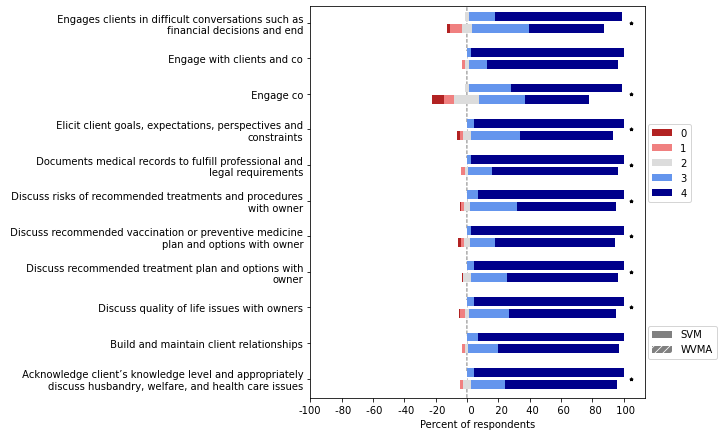

In [147]:
one_plot(df, FIGURE=13)

## Main

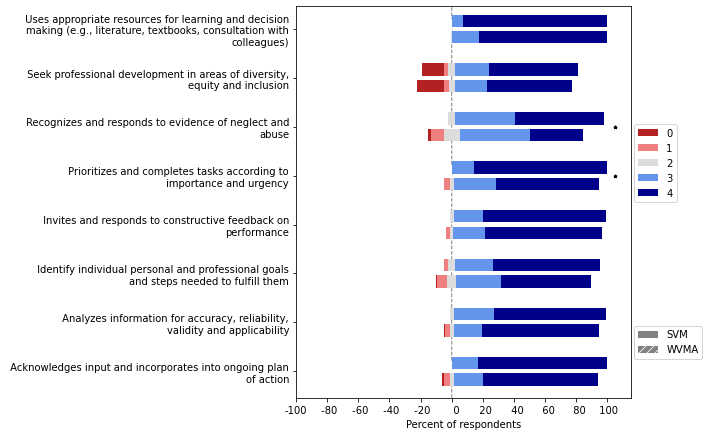

In [148]:
for fig_num in fig_nums:
    one_plot(df, FIGURE=fig_num)